# Segmentos y Churn de Hotel VIP

## Objetivo:

Como dueño de un hotel famoso y con muchas transacciones, registro comercial pendiente a confirmar, deseo saber cuales son mis segmentos de clientes y que segmento es el que tiene mayor perdida porcentual de clientes.


## Datos:

- tlacuachitos_vip_transactions.csv
- tlacuachitos_vip_customers_data.csv

## Actividad 1)
- Elabora y explica segmentos de clientes que podría usar para realizar mi dirección estratégica.

## Actividad 2)
- Calcula y obtén el porcentaje de clientes perdidos que tengo en cada segmento

In [44]:
#IMPORTAR LIBRERÍAS
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#IMPORTAR DATOS
transactions = pd.read_csv("tlacuachitos_vip_transactions.csv")
data = pd.read_csv("tlacuachitos_vip_customers_data.csv")

In [25]:
transactions.head()

,CustomerID,TransactionDate,TransactionAmount
0,1,2023-10-31,518.444092
1,1,2024-07-31,353.796197
2,1,2024-01-31,38.206591
3,1,2024-06-30,724.929423
4,2,2022-02-28,145.616000


In [26]:
data.head()

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31
1,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31
2,3,46,57978.753383,3,Bachelor,Finance,Europe,1,2019-05-31
3,4,32,60445.266900,3,High School,Education,South America,1,2021-02-28
4,5,60,57741.870929,5,Bachelor,Entertainment,Asia,0,2018-10-31


In [27]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         4346 non-null   int64  
 1   TransactionDate    4346 non-null   object 
 2   TransactionAmount  4346 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 102.0+ KB


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           1143 non-null   int64  
 1   Age                  1143 non-null   int64  
 2   Income               1143 non-null   float64
 3   Tenure               1143 non-null   int64  
 4   Education            1143 non-null   object 
 5   Industry             1143 non-null   object 
 6   Geographic Location  1143 non-null   object 
 7   Churn_Risk           1143 non-null   int64  
 8   Cohort               1143 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 80.5+ KB


In [29]:
#ELIMINAMOS COLUMNAS QUE NO NOS SIRVEN PARA AGRUPAR
cluster_data = data.drop(['Churn_Risk','Cohort'], axis=1)
cluster_data = cluster_data.set_index('CustomerID')
cluster_data

,Age,Income,Tenure,Education,Industry,Geographic Location
CustomerID,,,,,,
1,56,52752.677346,3,Master,Technology,Europe
2,69,55297.364348,6,Bachelor,Technology,South America
3,46,57978.753383,3,Bachelor,Finance,Europe
4,32,60445.266900,3,High School,Education,South America
5,60,57741.870929,5,Bachelor,Entertainment,Asia
...,...,...,...,...,...,...
1139,26,45236.402018,8,Bachelor,Education,Europe
1140,51,39868.078327,9,Bachelor,Education,Asia
1141,29,57043.387540,5,High School,Finance,North America


In [37]:
#CLUSTERIZAMOS
# Convertir variables categóricas en variables dummies
categorical_features = ['Education', 'Industry', 'Geographic Location']
data_encoded = pd.get_dummies(cluster_data, columns=categorical_features, drop_first=True)

In [39]:
# Preparar los datos seleccionando características relevantes y normalizándolos
features = ['Income', 'Age', 'Tenure'] + list(data_encoded.columns[3:])  # Incluir características categóricas codificadas
x = data_encoded.loc[:, features].values
x = StandardScaler().fit_transform(x)  # Normalización de las características

In [56]:
# Aplicar K-means clustering para identificar segmentos de clientes
kmeans = KMeans(n_clusters=6, random_state=42) 
labels = kmeans.fit_predict(x)

C:\Users\reyes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [57]:
# Agregar las etiquetas del cluster al DataFrame original para análisis
data_encoded['Cluster'] = labels

In [58]:
# Visualizar los resultados del clustering
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

C:\Users\reyes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\reyes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\reyes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


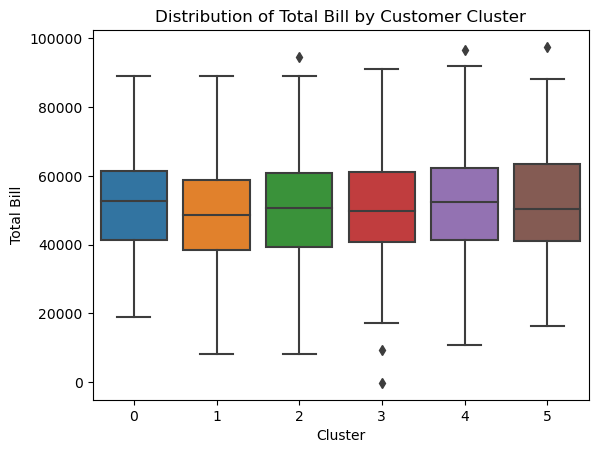

In [71]:
# Create a boxplot to visualize the distribution of 'total_bill' for each 'Cluster'
sns.boxplot(x='Cluster', y='Income', data=data_encoded)

# Set labels and title
plt.xlabel('Cluster')
plt.ylabel('Total Bill')
plt.title('Distribution of Total Bill by Customer Cluster')

# Display the plot
plt.show()


In [60]:
# Determinar el número óptimo de clusters usando el método del codo
sum_of_squared_distances = []
K = range(1, 15)  # Ajuste el rango según sea necesario
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

C:\Users\reyes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\reyes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\reyes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\reyes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

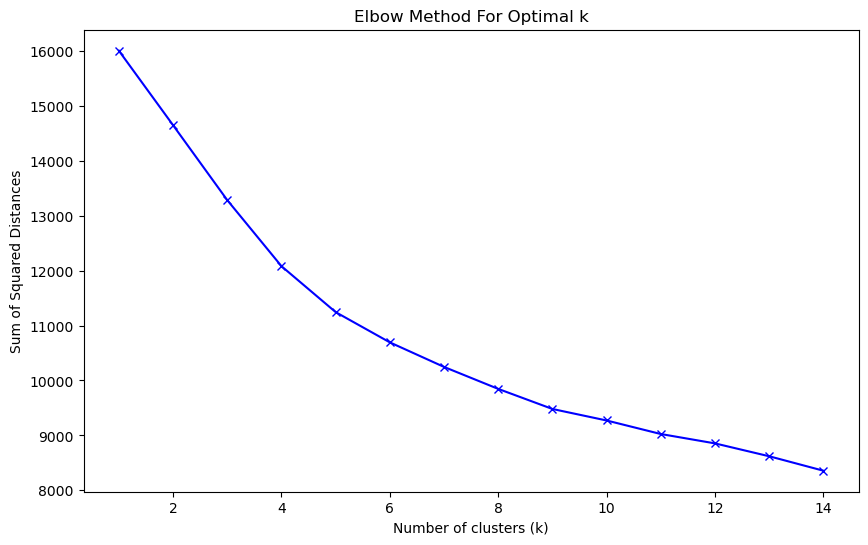

In [61]:
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [66]:
# Define a function to summarize the cluster characteristics
def summarize_clusters(data):
    # Numerical features
    numerical_features = ['Income', 'Age', 'Tenure']  # Modify this list based on your dataset
    # Categorical features (assuming dummy variables were created)
    categorical_features = [col for col in data.columns if col.startswith('Education') or col.startswith('Industry') or col.startswith('Geography Location')]

    # Summary DataFrame for numerical features
    cluster_summary_numerical = data.groupby('Cluster')[numerical_features].mean()
    
    # Summary DataFrame for categorical features
    cluster_summary_categorical = data.groupby('Cluster')[categorical_features].agg(lambda x: x.value_counts().index[0])

    return cluster_summary_numerical, cluster_summary_categorical

# Generate the summary for each cluster
cluster_summary_numerical, cluster_summary_categorical = summarize_clusters(data_encoded)

C:\Users\reyes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\reyes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\reyes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\reyes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

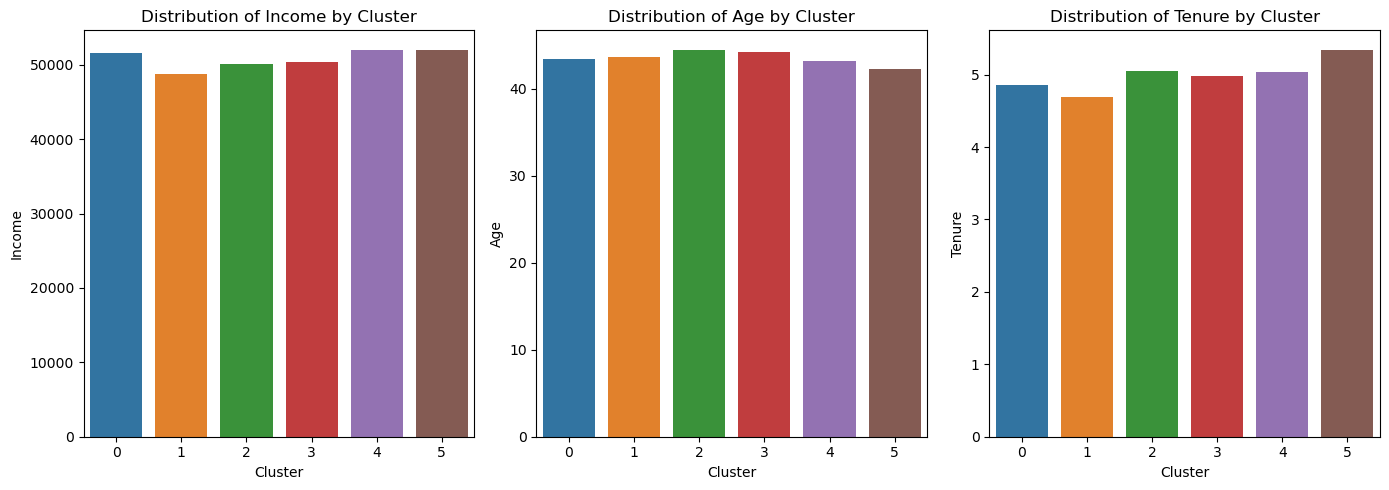

C:\Users\reyes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\reyes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\reyes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\reyes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

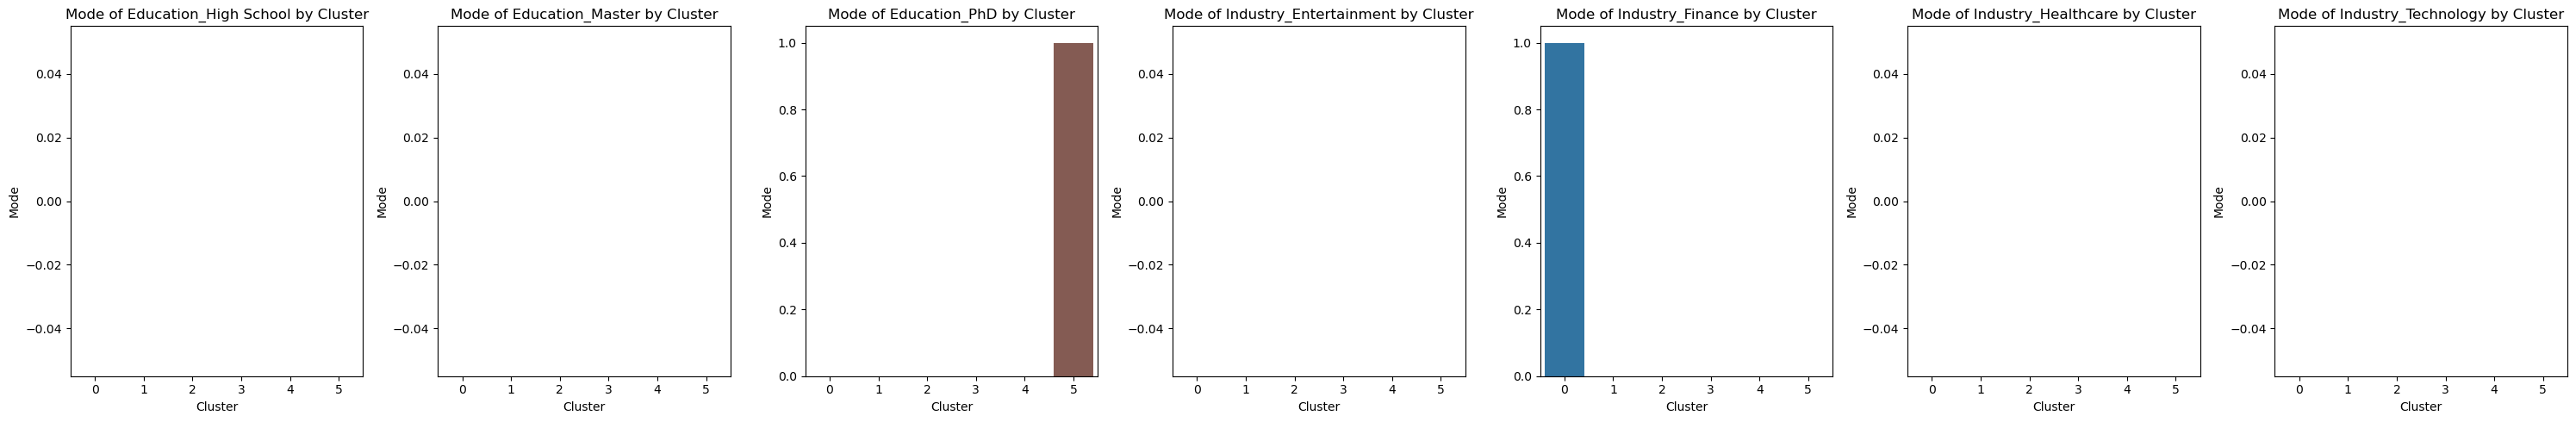

In [73]:
# Plotting
def plot_cluster_summary(cluster_summary_numerical, cluster_summary_categorical):
    # Plot numerical summaries
    fig, axes = plt.subplots(nrows=1, ncols=len(cluster_summary_numerical.columns), figsize=(14, 5))
    for i, col in enumerate(cluster_summary_numerical.columns):
        sns.barplot(x=cluster_summary_numerical.index, y=col, data=cluster_summary_numerical, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} by Cluster')
        axes[i].set_xlabel('Cluster')
        axes[i].set_ylabel(col)

    plt.tight_layout()
    plt.show()

    # Plot categorical summaries
    fig, axes = plt.subplots(nrows=1, ncols=len(cluster_summary_categorical.columns), figsize=(30, 5))
    for i, col in enumerate(cluster_summary_categorical.columns):
        sns.barplot(x=cluster_summary_categorical.index, y=col, data=cluster_summary_categorical, ax=axes[i])
        axes[i].set_title(f'Mode of {col} by Cluster')
        axes[i].set_xlabel('Cluster')
        axes[i].set_ylabel('Mode')

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_cluster_summary(cluster_summary_numerical, cluster_summary_categorical)

### CONCLUSIÓN PARTE 1

Luego de agrupar los datos con el algoritmo de Kmeans, podemos tomar ciertas conclusiones. La primera y más importante es que todos los cluster son muy parecidos en su composición categórica, menos dos, de lo que se puede apreciar. Esto quiere decir que el algoritmo no está siendo usado de la manera más efectiva ya que los clusters como tal no están segmentado de manera eficiente. Sin embargo, si asumimos que los clusters tienen los conjuntos más importantes de datos, podemos analizar que nuestras variables numéricas en promedio son muy acercadas unas a otras. 